In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tensorboard as tb
import glob
import os

In [16]:
data_dir = 'tensorboard-data'


---
# Learning Rate

[]

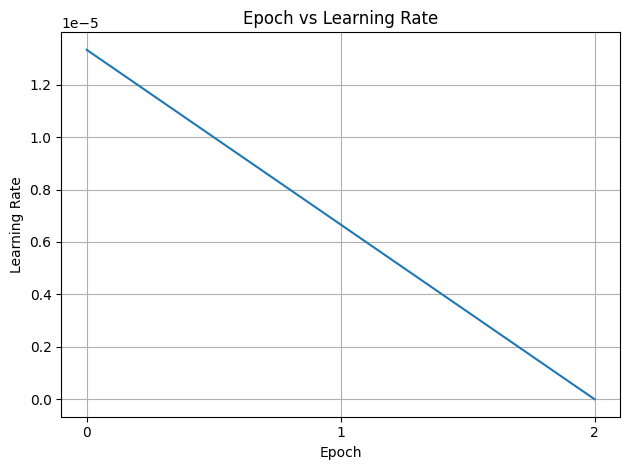

In [36]:
train_df = pd.read_csv(os.path.join(data_dir, 'train-epoch-learning-rate.csv'))
plt.plot(train_df['Step'], train_df['Value'])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Epoch vs Learning Rate')
plt.xticks(range(0,3))
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Figures', 'epoch-vs-lr.png'), dpi=500)
plt.plot()

---
# Epoch Loss

[]

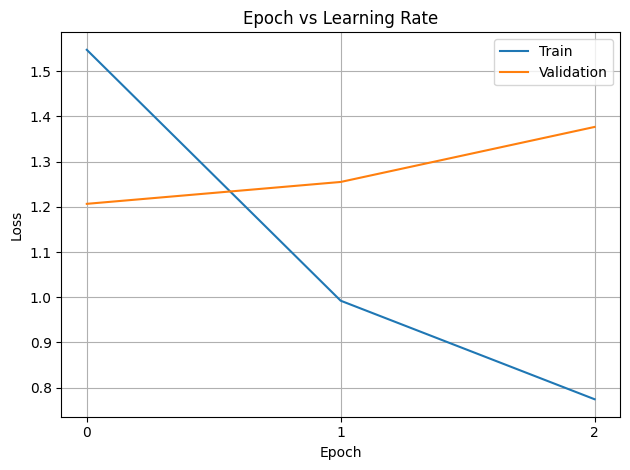

In [35]:
train_df = pd.read_csv(os.path.join(data_dir, 'train-epoch-loss.csv'))
val_df = pd.read_csv(os.path.join(data_dir, 'validation-epoch-loss.csv'))
plt.plot(train_df['Step'], train_df['Value'], label='Train')
plt.plot(val_df['Step'], val_df['Value'], label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Learning Rate')
plt.xticks(range(0,3))
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Figures', 'epoch-vs-loss.png'), dpi=500)
plt.plot()

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'summary_iterator'